<a href="https://colab.research.google.com/github/LeoMagallanes/Incident-Classifier/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##EDA
#Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
MagaLink = '/content/drive/MyDrive/IA/7mo sem/IntelligentsAgents/Proyecto/Incidents-subset'

CarlosLink ='/content/drive/MyDrive/Proyecto/Incidents-subset'

currentRoot=CarlosLink

In [ ]:
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder

In [ ]:
# Obtener la lista de nombres de las carpetas en el directorio principal
carpetas = [nombre for nombre in os.listdir(currentRoot) if os.path.isdir(os.path.join(currentRoot, nombre))]
name_categories = [nombre for nombre in os.listdir(currentRoot) if os.path.isdir(os.path.join(currentRoot, nombre))]

# Imprimir los nombres de las carpetas
for carpeta in carpetas:
    print(carpeta)

nuclear_explosion
ice_storm
flooded
bicycle_accident
collapsed
oil_spill
airplane_accident
tornado
car_accident
earthquake
volcanic_eruption
wildfire


In [ ]:
import cv2
import os
images = {}
# Iterate over each subfolder
count=0
for folder in os.listdir(currentRoot):
    folder_path = os.path.join(currentRoot, folder)
    if os.path.isdir(folder_path):
        # Get the names of the files in the subfolder
        files = os.listdir(folder_path)
        image_list=[]
        # Rename the files sequentially
        for i, file_name in enumerate(files, start=1):
            file_path = os.path.join(folder_path, file_name)
            new_file_name = f"{i}_{folder}{os.path.splitext(file_name)[1]}"
            new_file_path = os.path.join(folder_path, new_file_name)
            image_list.append(new_file_name)
            # Rename the file
            #try:
            #    os.rename(file_path, new_file_path)
            #except Exception:
            #    None
            #try:
            #    cv2.imread(new_file_path)
            #except cv2.error as e:
            #    count+=1
        images[folder]=image_list
print(count)

0


nuclear_explosion: 231 occurrences
ice_storm: 615 occurrences
flooded: 957 occurrences
bicycle_accident: 228 occurrences
collapsed: 688 occurrences
oil_spill: 293 occurrences
airplane_accident: 872 occurrences
tornado: 281 occurrences
car_accident: 966 occurrences
earthquake: 924 occurrences
volcanic_eruption: 627 occurrences
wildfire: 676 occurrences


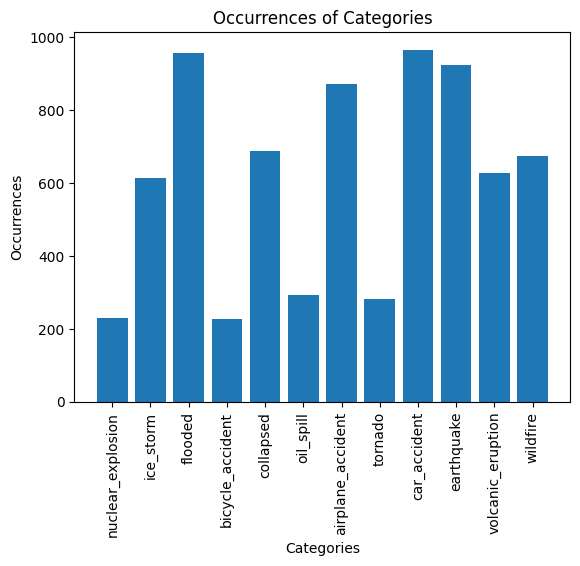

In [ ]:
occurrences = [len(images[category]) for category in carpetas]

# Print the occurrences for each category
for i, category in enumerate(carpetas):
    print(f"{category}: {occurrences[i]} occurrences")


plt.bar(carpetas, occurrences)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Occurrences')
plt.title('Occurrences of Categories')

# Rotate x-labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [ ]:
# Directory containing the subfolders
directory = CarlosLink

# Define the number of categories, channels, and bins
ncategories = 12
nchannels = 3
nbins = 16

# Initialize an empty list to store histograms
histograms_list = []

# Iterate over each subfolder
for i, folder in enumerate(os.listdir(directory)):
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):
        # Iterate over each image in the subfolder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            if os.path.isfile(image_path):
                # Read the image
                image = cv2.imread(image_path)
                # Calculate color histograms for each channel
                for c in range(nchannels):
                    channel_hist = cv2.calcHist([image], [c], None, [nbins], [0, 256])
                    # Append the histogram information to the list
                    histograms_list.append([folder, image_name, c, channel_hist.flatten()])
# Create a DataFrame from the histograms list with appropriate column names
df = pd.DataFrame(histograms_list, columns=['Categorie', 'Image_name', 'Channel', 'Histogram'])

In [ ]:
# Group the DataFrame by "Categorie" and "Histogram"
grouped_df = df.groupby(['Categorie','Channel', 'Histogram'])


# Calculate the standard deviation and mean for each bin within each category
std_dev = df.groupby(['Categorie','Channel'])['Histogram'].apply(lambda x: np.std(list(x), axis=0))
mean = df.groupby(['Categorie','Channel'])['Histogram'].apply(lambda x: np.mean(list(x), axis=0))

mean['airplane_accident',0]

array([78114.86 , 88363.26 , 86891.72 , 85915.664, 79407.28 , 71331.836,
       64176.28 , 53128.387, 46577.36 , 43771.03 , 41546.79 , 38436.34 ,
       39389.027, 37028.88 , 43640.477, 49577.652], dtype=float32)

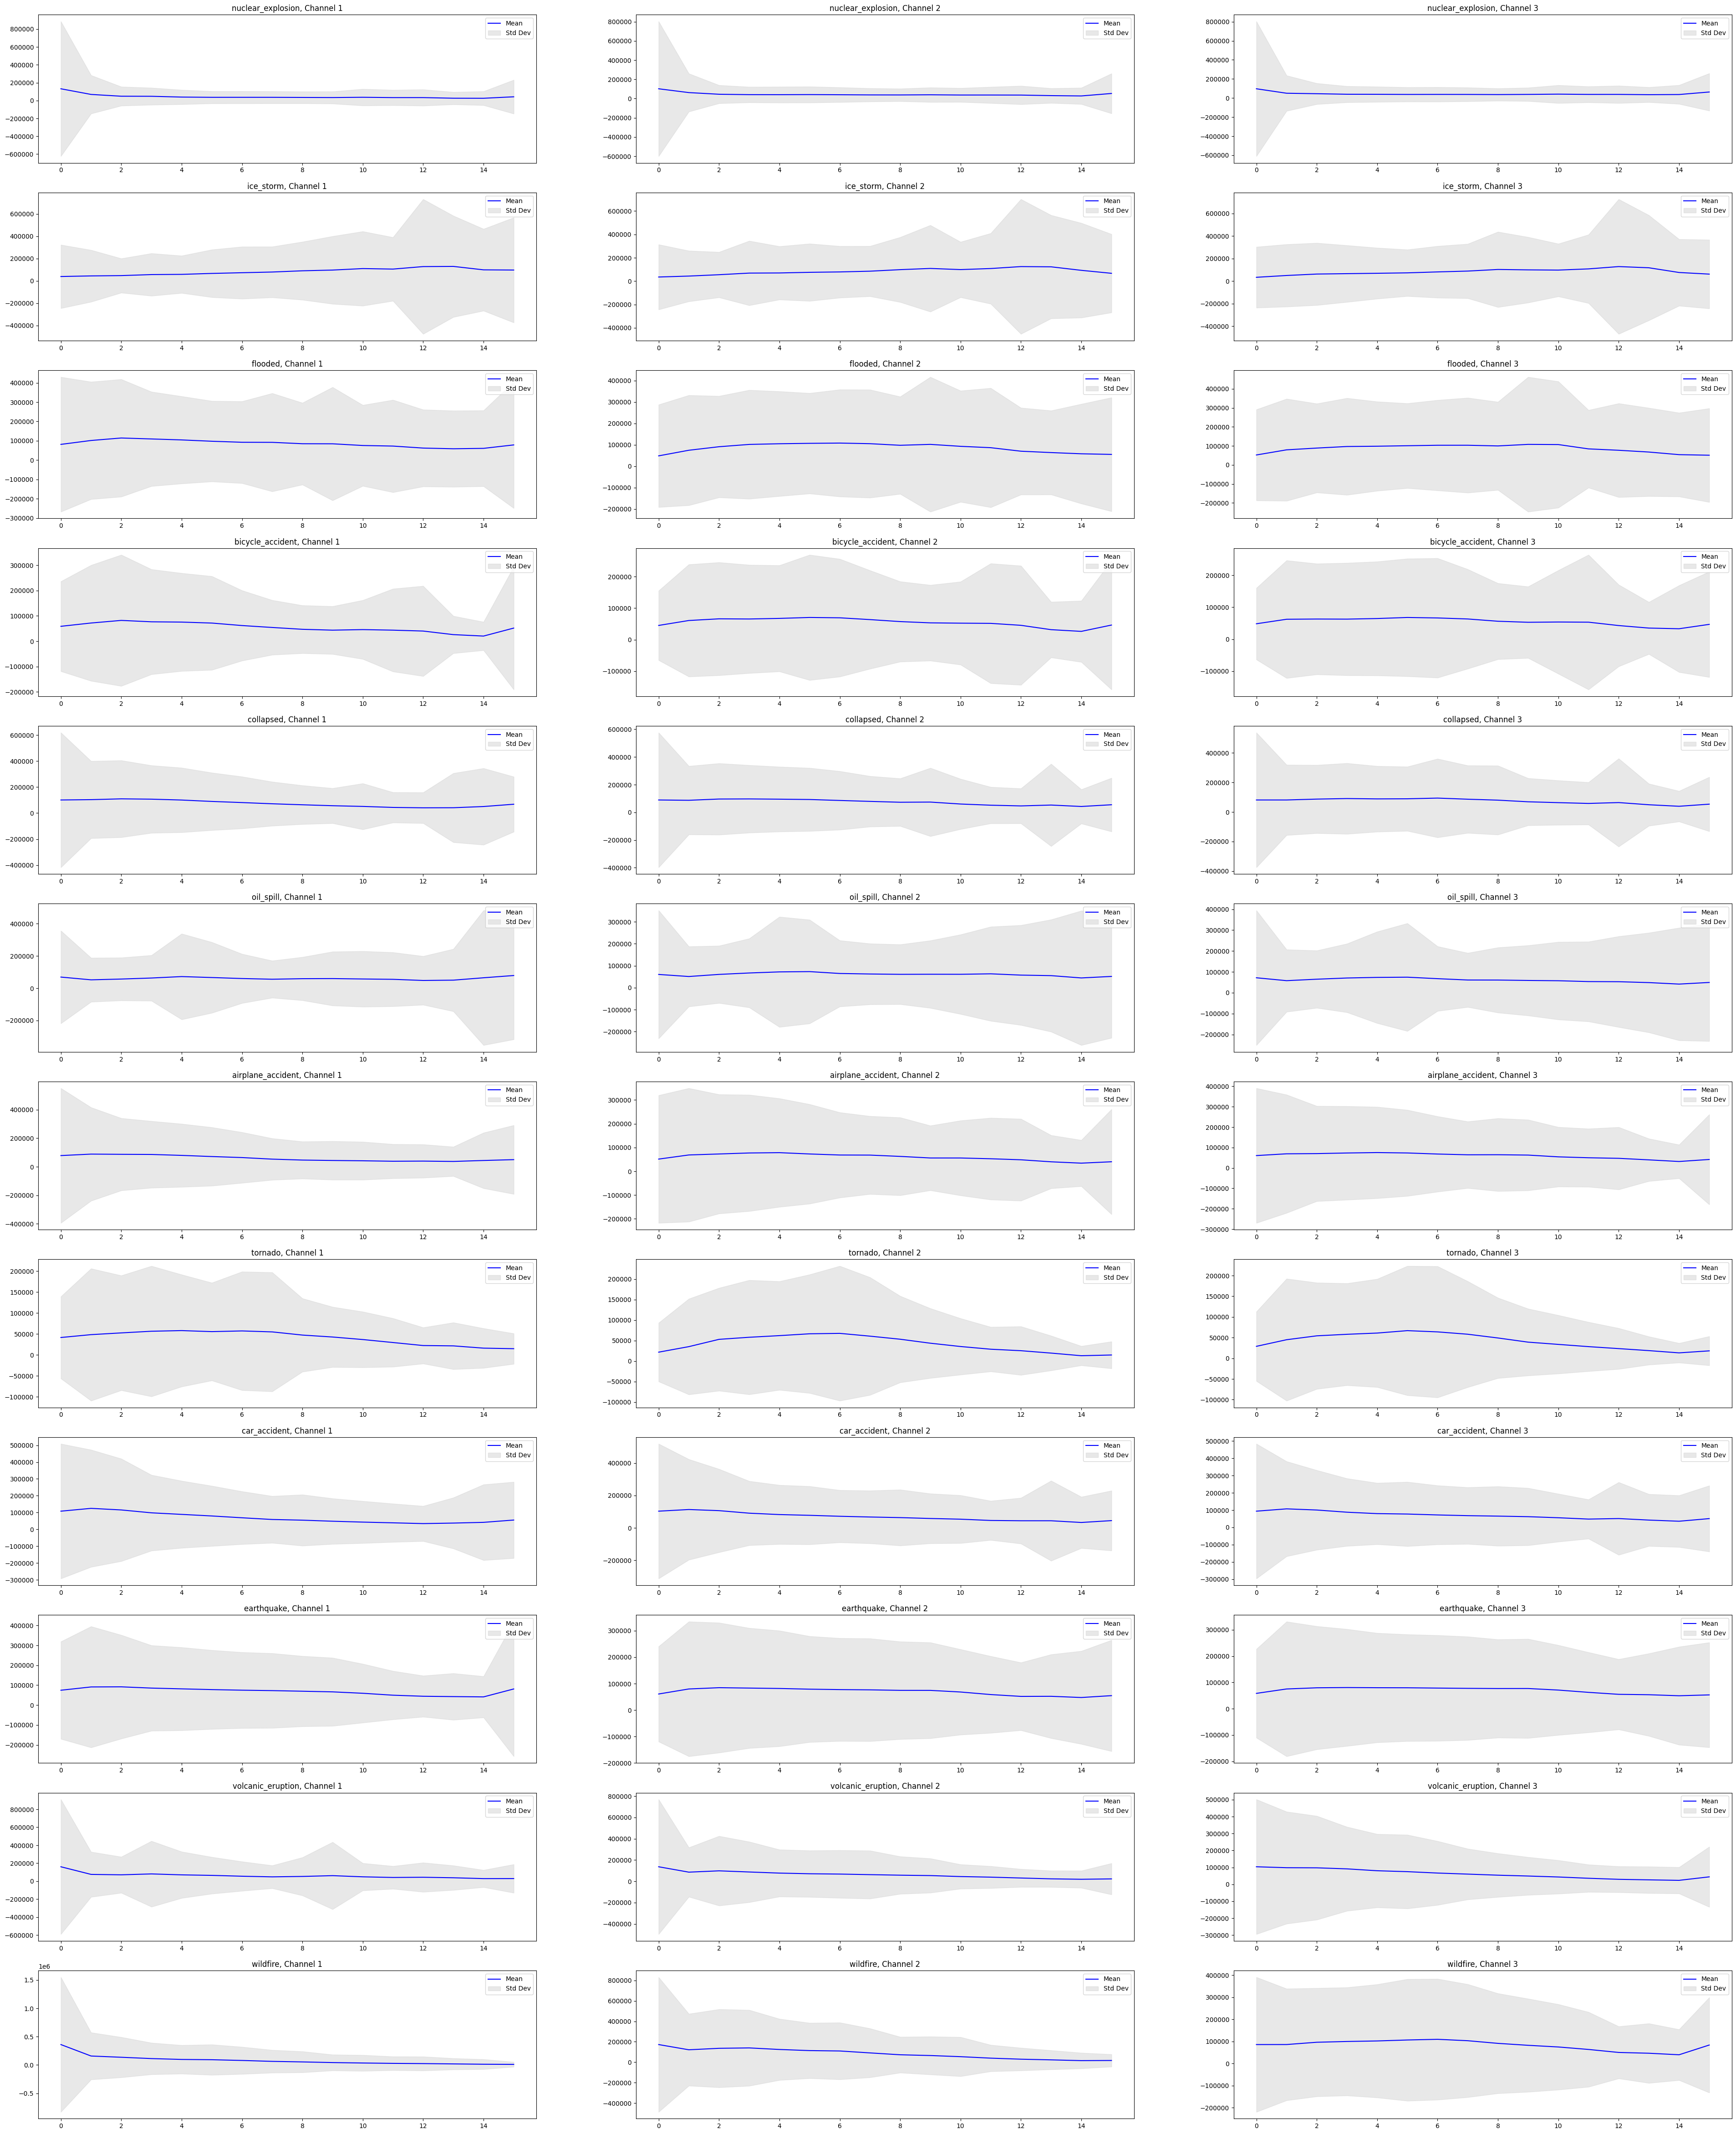

In [ ]:
# Plot the mean histograms and standard deviation
fig, axes = plt.subplots(ncategories, nchannels, figsize=(48, 60))

for i,category_name in enumerate(name_categories):
  for j in range(nchannels):
    ax = axes[i, j]
    h_mean=mean[category_name, j]
    h_std=std_dev[category_name, j]
    ax.plot(mean[category_name, j], color='blue', label='Mean')
    ax.fill_between(range(nbins), h_mean - h_std, h_mean + h_std, color='lightgray', alpha=0.5, label='Std Dev')
    ax.set_title(f"{category_name}, Channel {j+1}")
    ax.legend()

plt.show()


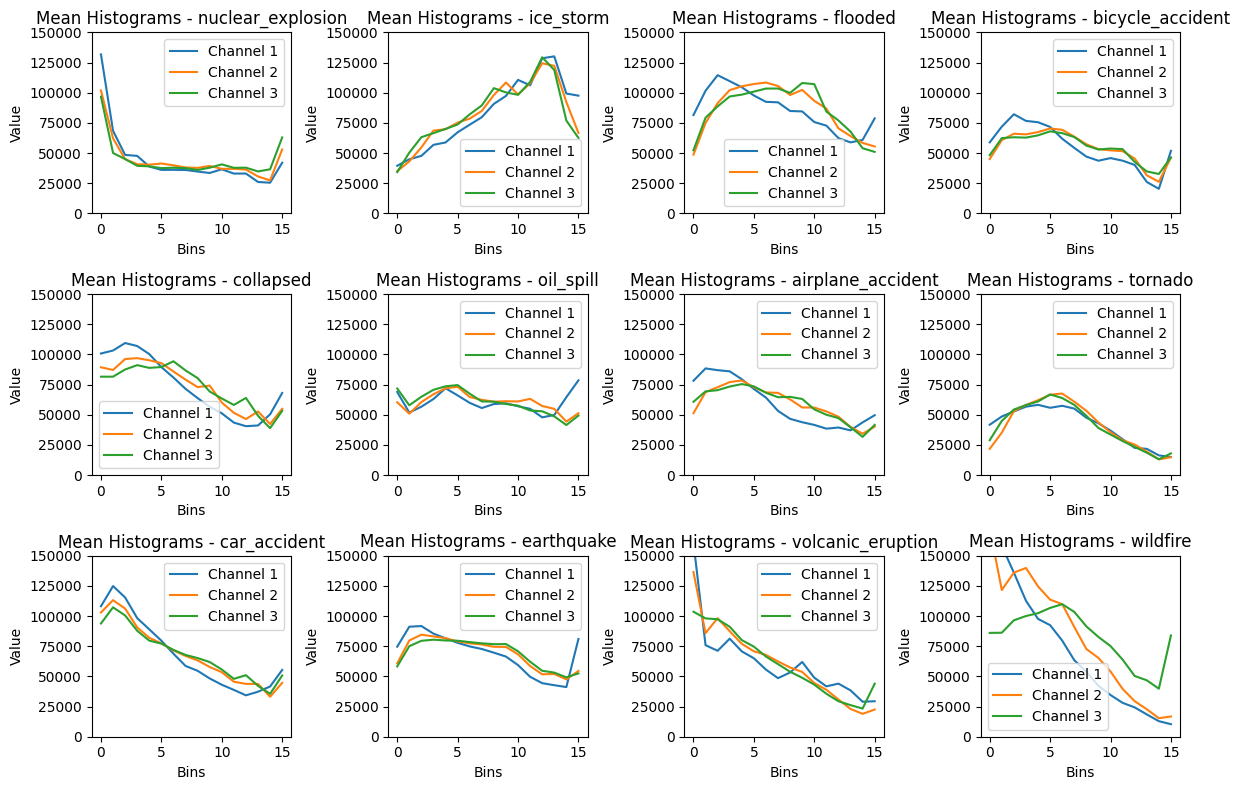

In [ ]:
# Define the number of rows and columns in the grid
num_rows = int(np.ceil(len(name_categories) / 4))
num_columns = 4

# Create the grid of plots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 8))

# Iterate over each category and plot the mean histograms
for i, category_name in enumerate(name_categories):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]

    for j in range(nchannels):
        h_mean = mean[category_name, j]
        color = plt.cm.tab10(j)  # Use a different color for each channel

        ax.plot(h_mean, color=color, label=f"Channel {j+1}")

    ax.set_xlabel('Bins')
    ax.set_ylabel('Value')
    ax.set_title(f"Mean Histograms - {category_name}")
    ax.legend()

    # Set the same y-axis limits for all subplots
    ax.set_ylim([0,150000])

# Hide any unused subplots
if len(name_categories) < (num_rows * num_columns):
    for i in range(len(name_categories), (num_rows * num_columns)):
        row = i // num_columns
        col = i % num_columns
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()



In [ ]:
histograms_array = np.array(histograms_list)

histograms_per_channels=[]
for i in range(nchannels):
  histograms_per_channels.append(histograms_array[histograms_array[:,2]==i])

<ipython-input-15-d5ec36081bff>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  histograms_array = np.array(histograms_list)


In [ ]:
pca_results = []

# Perform PCA for each channel's histograms
for i in range(nchannels):
    # Apply PCA
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(histograms_per_channels[i][:,3].tolist())
    pca_results.append(pca_result)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Create a color map with a unique color for each category
color_map = cm.get_cmap('tab20')

# Create a dictionary to store the category-color mapping
category_colors = {}

# Assign a color to each category
for i, category_name in enumerate(name_categories):
    color = color_map(i % 12)  # Adjust the modulo value based on the number of categories
    category_colors[category_name] = color


for chanel_number, channel_result in enumerate(pca_results):
    # Plot the transformed data for each channel in a 3D space with different colors per category
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    for i, pca_components_for_channel in enumerate(channel_result):
        if random.random() > 0.4:
          continue
        x = pca_components_for_channel[0]
        y = pca_components_for_channel[1]
        z = pca_components_for_channel[2]
        category_name_i= histograms_per_channels[chanel_number][i][0]
        # Get the color for the category based on the colormap
        color = category_colors[category_name_i]

        ax.scatter(x, y, z, color=color)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('Transformed Data in 3D Space')
    ax.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
for chanel_number, channel_result in enumerate(pca_results):
    # Plot the transformed data for each channel in a 2D space with different colors per category
    fig, ax = plt.subplots(figsize=(15, 15))
    for i, pca_components_for_channel in enumerate(channel_result):
        if random.random() > 0.6:
            continue
        x = pca_components_for_channel[0]
        y = pca_components_for_channel[1]
        category_name_i = histograms_per_channels[chanel_number][i][0]
        # Get the color for the category based on the colormap
        color = category_colors[category_name_i]

        ax.scatter(x, y, color=color)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title('Transformed Data in 2D Space')
    ax.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Group the DataFrame by 'Category' and 'Image_name' and apply a custom function to create the feature vector
feature_df = df.groupby(['Categorie', 'Image_name']).apply(lambda x: np.concatenate(x['Histogram'].values)).reset_index()
feature_df.columns = ['Categorie', 'Image_name', 'Feature_vector']

# Split the feature DataFrame into features (X) and target labels (y)
X = feature_df['Feature_vector'].tolist()
y = feature_df['Categorie'].tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87, stratify=y)


In [ ]:
# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=200, random_state=87)
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.328125


In [ ]:
# Initialize and train the SVM classifier
clf = SVC(kernel='rbf', random_state=87)
clf.fit(X_train, y_train)
# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.21467391304347827


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Encode the target labels with integer values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 12,
    'max_depth': 24,
    'eta': 0.01,
    'subsample': 0.7,
    'colsample_bytree': 0.4,
    'eval_metric': 'mlogloss'
}

# Create the DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the testing data
y_pred = model.predict(dtest)

# Convert the predicted labels to integers
y_pred = y_pred.astype(int)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.32472826086956524


In [ ]:


# Encode the target labels with integer values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the feature vectors to match CNN input shape
X_train = np.array(X_train).reshape(-1, nbins, nchannels, 1)
X_test = np.array(X_test).reshape(-1, nbins, nchannels, 1)

# Convert the target labels to one-hot encoding
num_classes = len(set(y))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the CNN model architecture
model = keras.Sequential([
    layers.Conv2D(512, kernel_size=(3, 3), activation="relu", input_shape=(nbins, nchannels, 1)),
    layers.MaxPooling2D(pool_size=(1, 1)),  # Adjust pool size to (1, 1)
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the testing data|
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
184/184 [==============================] - 2s 9ms/step - loss: 827.9921 - accuracy: 0.1239 - val_loss: 2.4538 - val_accuracy: 0.1264
Epoch 2/10
184/184 [==============================] - 2s 9ms/step - loss: 2.4425 - accuracy: 0.1228 - val_loss: 2.4251 - val_accuracy: 0.1427
Epoch 3/10
184/184 [==============================] - 2s 11ms/step - loss: 2.4207 - accuracy: 0.1288 - val_loss: 2.4044 - val_accuracy: 0.1427
Epoch 4/10
184/184 [==============================] - 2s 11ms/step - loss: 2.4057 - accuracy: 0.1288 - val_loss: 2.3899 - val_accuracy: 0.1427
Epoch 5/10
184/184 [==============================] - 2s 12ms/step - loss: 2.3956 - accuracy: 0.1288 - val_loss: 2.3800 - val_accuracy: 0.1427
Epoch 6/10
184/184 [==============================] - 2s 9ms/step - loss: 2.3889 - accuracy: 0.1288 - val_loss: 2.3731 - val_accuracy: 0.1427
Epoch 7/10
184/184 [==============================] - 2s 9ms/step - loss: 2.3844 - accuracy: 0.1288 - val_loss: 2.3684 - val_accuracy: 0.1427
E